This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [25]:
from tensorflow.keras.datasets import imdb # import the imdb dataset from keras library 
(train_data, train_labels), (test_data, test_labels) = imdb.load_data( # loading the dataset into train and test data and labels 
    num_words=10000) # including only the top 10,000 most frequently occurring words in the training data

In [26]:
train_data[0] # displaying the first review in the training data

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [27]:
train_labels[0] # displaying the first label in the training data

1

In [28]:
max([max(sequence) for sequence in train_data]) # displaying the maximum index of the word in the training data

9999

**Decoding reviews back to text**

In [29]:
word_index = imdb.get_word_index() # getting the word index from the imdb dataset
reverse_word_index = dict( # reversing the word index
    [(value, key) for (key, value) in word_index.items()]) # reversing the word index using dictionary comprehension 
decoded_review = " ".join( # joining the words in the review 
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]) # getting the words from the reversed word index and joining them using join function

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [30]:
import numpy as np # importing numpy library 
def vectorize_sequences(sequences, dimension=10000): # defining a function to vectorize the sequences 
    results = np.zeros((len(sequences), dimension)) # creating an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences): # iterating over the sequences
        for j in sequence: # iterating over the sequence
            results[i, j] = 1. # setting specific indices of results[i] to 1s
    return results # returning the results
x_train = vectorize_sequences(train_data) # vectorizing the training data
x_test = vectorize_sequences(test_data) # vectorizing the test data

In [31]:
x_train[0] # displaying the first vectorized training data

array([0., 1., 1., ..., 0., 0., 0.])

In [32]:
y_train = np.asarray(train_labels).astype("float32") # converting the training labels to numpy array
y_test = np.asarray(test_labels).astype("float32") # converting the test labels to numpy array

### Building your model

**Model definition**

In [33]:
from tensorflow import keras # importing the keras library
from tensorflow.keras import layers # importing the layers module from keras library

model = keras.Sequential([ # creating a sequential model
    layers.Dense(16, activation="relu"), # adding a dense layer with 16 units and relu activation function
    layers.Dense(16, activation="relu"), # adding a dense layer with 16 units and relu activation function
    layers.Dense(1, activation="sigmoid") # adding a dense layer with 1 unit and sigmoid activation function
])

**Compiling the model**

In [34]:
model.compile(optimizer="rmsprop", # compiling the model with rmsprop optimizer
              loss="binary_crossentropy", # compiling the model with binary_crossentropy loss function
              metrics=["accuracy"]) # compiling the model with accuracy metric

### Validating your approach

**Setting aside a validation set**

In [35]:
x_val = x_train[:10000] # setting the validation data  
partial_x_train = x_train[10000:] # setting the partial training data
y_val = y_train[:10000] # setting the validation labels
partial_y_train = y_train[10000:] # setting the partial training labels

**Training your model**

In [36]:
history = model.fit(partial_x_train, # fitting the model to the training data and labels 
                    partial_y_train, # fitting the model to the training data and labels
                    epochs=20, # setting the number of epochs to 20
                    batch_size=512, # setting the batch size to 512
                    validation_data=(x_val, y_val)) # setting the validation data and labels

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5525 - accuracy: 0.7567 - val_loss: 0.4344 - val_accuracy: 0.8462
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3258 - accuracy: 0.8974 - val_loss: 0.3129 - val_accuracy: 0.8893
Epoch 3/20
30/30 [==============================] - 0s 7ms/step - loss: 0.2373 - accuracy: 0.9247 - val_loss: 0.2831 - val_accuracy: 0.8910
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 0.1844 - accuracy: 0.9428 - val_loss: 0.2934 - val_accuracy: 0.8826
Epoch 5/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1480 - accuracy: 0.9551 - val_loss: 0.3143 - val_accuracy: 0.8740
Epoch 6/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1207 - accuracy: 0.9631 - val_loss: 0.2926 - val_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1015 - accuracy: 0.9695 - val_loss: 0.3104 - val_accuracy: 0.8815
Epoch 8/20
30/30 [

In [37]:
history_dict = history.history # getting the history of the model
history_dict.keys() # displaying the keys of the history dictionary

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

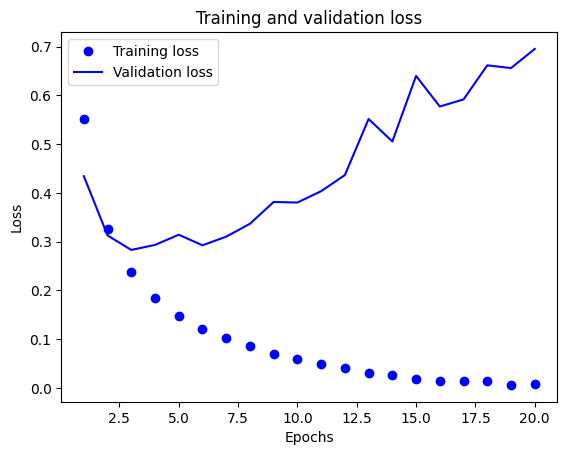

In [38]:
import matplotlib.pyplot as plt # importing the matplotlib library
history_dict = history.history # getting the history of the model
loss_values = history_dict["loss"] # getting the loss values from the history dictionary
val_loss_values = history_dict["val_loss"] # getting the validation loss values from the history dictionary
epochs = range(1, len(loss_values) + 1) # setting the range of epochs to the length of loss values + 1
plt.plot(epochs, loss_values, "bo", label="Training loss") # plotting the training loss values 
plt.plot(epochs, val_loss_values, "b", label="Validation loss") # plotting the validation loss values 
plt.title("Training and validation loss") # setting the title of the plot
plt.xlabel("Epochs") # setting the x-axis label
plt.ylabel("Loss") # setting the y-axis label
plt.legend() # displaying the legend
plt.show() # displaying the plot

**Plotting the training and validation accuracy**

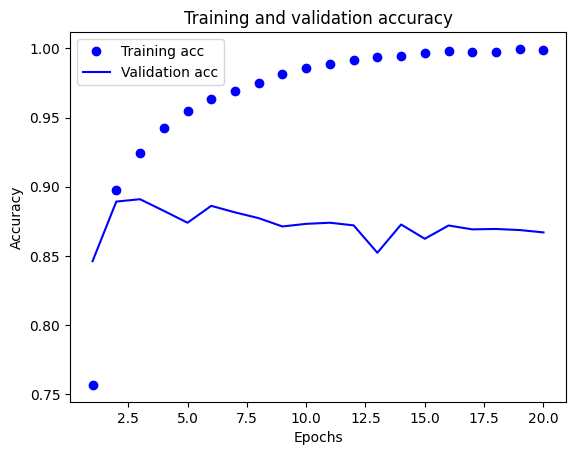

In [39]:
plt.clf() # clearing the plot
acc = history_dict["accuracy"] # getting the accuracy values from the history dictionary
val_acc = history_dict["val_accuracy"] # getting the validation accuracy values from the history dictionary
plt.plot(epochs, acc, "bo", label="Training acc") # plotting the training accuracy values
plt.plot(epochs, val_acc, "b", label="Validation acc") # plotting the validation accuracy values
plt.title("Training and validation accuracy") # setting the title of the plot
plt.xlabel("Epochs") # setting the x-axis label
plt.ylabel("Accuracy") # setting the y-axis label
plt.legend() # displaying the legend
plt.show() # displaying the plot

**Retraining a model from scratch**

In [40]:
model = keras.Sequential([ # creating a sequential model
    layers.Dense(16, activation="relu"), # adding a dense layer with 16 units and relu activation function
    layers.Dense(16, activation="relu"), # adding a dense layer with 16 units and relu activation function
    layers.Dense(1, activation="sigmoid") # adding a dense layer with 1 unit and sigmoid activation function
]) 
model.compile(optimizer="rmsprop", # compiling the model with rmsprop optimizer
              loss="binary_crossentropy", # compiling the model with binary_crossentropy loss function
              metrics=["accuracy"]) # compiling the model with accuracy metric
model.fit(x_train, y_train, epochs=4, batch_size=512) # fitting the model to the training data and labels
results = model.evaluate(x_test, y_test) # evaluating the model on the test data and labels

Epoch 1/4
49/49 [==============================] - 0s 5ms/step - loss: 0.4560 - accuracy: 0.8236
Epoch 2/4
49/49 [==============================] - 0s 4ms/step - loss: 0.2603 - accuracy: 0.9077
Epoch 3/4
49/49 [==============================] - 0s 4ms/step - loss: 0.1969 - accuracy: 0.9284
Epoch 4/4
782/782 [==============================] - 1s 654us/step - loss: 0.2954 - accuracy: 0.8829


In [41]:
results # displaying the results of the model

[0.29541000723838806, 0.8828799724578857]

### Using a trained model to generate predictions on new data

In [42]:
model.predict(x_test) # predicting the test data using the model

782/782 [==============================] - 0s 369us/step


array([[0.19206952],
       [0.99992317],
       [0.9138512 ],
       ...,
       [0.10514905],
       [0.06723563],
       [0.63286597]], dtype=float32)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [43]:
from tensorflow.keras.datasets import reuters # importing the reuters dataset from keras library
(train_data, train_labels), (test_data, test_labels) = reuters.load_data( # loading the dataset into train and test data and labels
    num_words=10000) # including only the top 10,000 most frequently occurring words in the training data

In [44]:
len(train_data) # displaying the length of the training data

8982

In [45]:
len(test_data) # displaying the length of the test data

2246

In [46]:
train_data[10] # displaying the 10th review in the training data

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [47]:
word_index = reuters.get_word_index() # getting the word index from the reuters dataset
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # reversing the word index using dictionary comprehension
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]]) # getting the words from the reversed word index and joining them using join function

550378/550378 [==============================] - 0s 0us/step


In [48]:
train_labels[10] # displaying the 10th label in the training data

3

### Preparing the data

**Encoding the input data**

In [49]:
x_train = vectorize_sequences(train_data) # vectorizing the training data
x_test = vectorize_sequences(test_data) # vectorizing the test data

**Encoding the labels**

In [50]:
def to_one_hot(labels, dimension=46): # defining a function to one-hot encode the labels
    results = np.zeros((len(labels), dimension)) # creating an all-zero matrix of shape (len(labels), dimension)
    for i, label in enumerate(labels): # iterating over the labels
        results[i, label] = 1. # setting specific indices of results[i] to 1s
    return results # returning the results
y_train = to_one_hot(train_labels) # one-hot encoding the training labels
y_test = to_one_hot(test_labels) # one-hot encoding the test labels

In [51]:
from tensorflow.keras.utils import to_categorical # importing the to_categorical function from keras library
y_train = to_categorical(train_labels) # one-hot encoding the training labels
y_test = to_categorical(test_labels) # one-hot encoding the test labels

### Building your model

**Model definition**

In [52]:
model = keras.Sequential([ # creating a sequential model
    layers.Dense(64, activation="relu"), # adding a dense layer with 64 units and relu activation function
    layers.Dense(64, activation="relu"), # adding a dense layer with 64 units and relu activation function
    layers.Dense(46, activation="softmax") # adding a dense layer with 46 units and softmax activation function
])

**Compiling the model**

In [53]:
model.compile(optimizer="rmsprop", # compiling the model with rmsprop optimizer
              loss="categorical_crossentropy", # compiling the model with categorical_crossentropy loss function
              metrics=["accuracy"]) # compiling the model with accuracy metric

### Validating your approach

**Setting aside a validation set**

In [54]:
x_val = x_train[:1000] # setting the validation data
partial_x_train = x_train[1000:] # setting the partial training data
y_val = y_train[:1000] # setting the validation labels
partial_y_train = y_train[1000:] # setting the partial training labels

**Training the model**

In [55]:
history = model.fit(partial_x_train, # fitting the model to the training data and labels
                    partial_y_train, # fitting the model to the training data and labels
                    epochs=20, # setting the number of epochs to 20
                    batch_size=512, # setting the batch size to 512
                    validation_data=(x_val, y_val)) # setting the validation data and labels

Epoch 1/20
16/16 [==============================] - 1s 19ms/step - loss: 2.6411 - accuracy: 0.5064 - val_loss: 1.7715 - val_accuracy: 0.6450
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 1.4616 - accuracy: 0.6959 - val_loss: 1.3179 - val_accuracy: 0.6870
Epoch 3/20
16/16 [==============================] - 0s 9ms/step - loss: 1.0724 - accuracy: 0.7631 - val_loss: 1.1276 - val_accuracy: 0.7590
Epoch 4/20
16/16 [==============================] - 0s 9ms/step - loss: 0.8345 - accuracy: 0.8231 - val_loss: 1.0244 - val_accuracy: 0.7800
Epoch 5/20
16/16 [==============================] - 0s 9ms/step - loss: 0.6605 - accuracy: 0.8643 - val_loss: 0.9708 - val_accuracy: 0.7930
Epoch 6/20
16/16 [==============================] - 0s 10ms/step - loss: 0.5222 - accuracy: 0.8954 - val_loss: 0.9225 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 0s 11ms/step - loss: 0.4202 - accuracy: 0.9134 - val_loss: 0.8706 - val_accuracy: 0.8160
Epoch 8/20
16/16

**Plotting the training and validation loss**

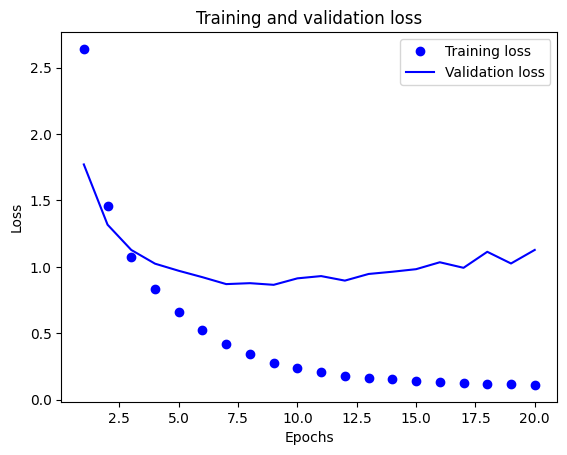

In [56]:
loss = history.history["loss"] # getting the loss values from the history dictionary
val_loss = history.history["val_loss"] # getting the validation loss values from the history dictionary
epochs = range(1, len(loss) + 1) # setting the range of epochs to the length of loss values + 1
plt.plot(epochs, loss, "bo", label="Training loss") # plotting the training loss values
plt.plot(epochs, val_loss, "b", label="Validation loss") # plotting the validation loss values
plt.title("Training and validation loss") # setting the title of the plot
plt.xlabel("Epochs") # setting the x-axis label
plt.ylabel("Loss") # setting the y-axis label
plt.legend() # displaying the legend
plt.show() # displaying the plot

**Plotting the training and validation accuracy**

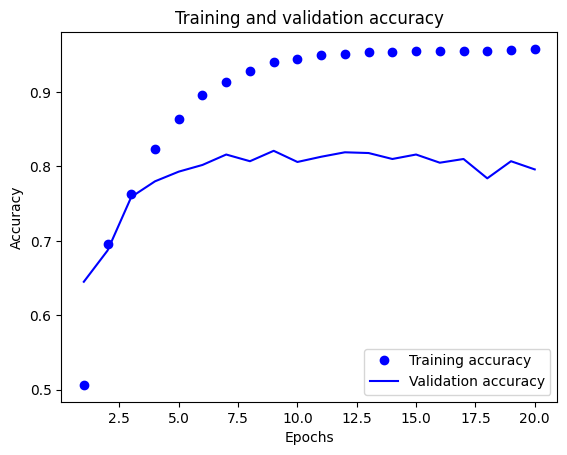

In [57]:
plt.clf() # clearing the plot
acc = history.history["accuracy"] # getting the accuracy values from the history dictionary
val_acc = history.history["val_accuracy"] # getting the validation accuracy values from the history dictionary
plt.plot(epochs, acc, "bo", label="Training accuracy") # plotting the training accuracy values
plt.plot(epochs, val_acc, "b", label="Validation accuracy") # plotting the validation accuracy values
plt.title("Training and validation accuracy") # setting the title of the plot
plt.xlabel("Epochs") # setting the x-axis label
plt.ylabel("Accuracy") # setting the y-axis label
plt.legend() # displaying the legend
plt.show() # displaying the plot

**Retraining a model from scratch**

In [58]:
model = keras.Sequential([ # creating a sequential model
  layers.Dense(64, activation="relu"), # adding a dense layer with 64 units and relu activation function
  layers.Dense(64, activation="relu"), # adding a dense layer with 64 units and relu activation function
  layers.Dense(46, activation="softmax") # adding a dense layer with 46 units and softmax activation function
])
model.compile(optimizer="rmsprop", # compiling the model with rmsprop optimizer
              loss="categorical_crossentropy", # compiling the model with categorical_crossentropy loss function
              metrics=["accuracy"]) # compiling the model with accuracy metric
model.fit(x_train, y_train, # fitting the model to the training data and labels
          epochs=9, # setting the number of epochs to 9
          batch_size=512) # setting the batch size to 512
results = model.evaluate(x_test, y_test) # evaluating the model on the test data and labels

Epoch 1/9
18/18 [==============================] - 0s 8ms/step - loss: 2.4350 - accuracy: 0.5503
Epoch 2/9
18/18 [==============================] - 0s 8ms/step - loss: 1.3376 - accuracy: 0.7164
Epoch 3/9
18/18 [==============================] - 0s 11ms/step - loss: 1.0007 - accuracy: 0.7917
Epoch 4/9
18/18 [==============================] - 0s 9ms/step - loss: 0.7805 - accuracy: 0.8349
Epoch 5/9
18/18 [==============================] - 0s 9ms/step - loss: 0.6150 - accuracy: 0.8680
Epoch 6/9
18/18 [==============================] - 0s 10ms/step - loss: 0.4873 - accuracy: 0.8982
Epoch 7/9
18/18 [==============================] - 0s 9ms/step - loss: 0.3964 - accuracy: 0.9166
Epoch 8/9
18/18 [==============================] - 0s 8ms/step - loss: 0.3239 - accuracy: 0.9293
Epoch 9/9
71/71 [==============================] - 0s 577us/step - loss: 0.9378 - accuracy: 0.7939


In [59]:
results # displaying the results of the model

[0.9377709627151489, 0.7938557267189026]

In [60]:
import copy # importing the copy library 
test_labels_copy = copy.copy(test_labels) # copying the test labels
np.random.shuffle(test_labels_copy) # shuffling the test labels
hits_array = np.array(test_labels) == np.array(test_labels_copy) # comparing the test labels with the shuffled test labels
hits_array.mean() # calculating the mean of the hits array

0.19991095280498664

### Generating predictions on new data

In [61]:
predictions = model.predict(x_test) # predicting the test data using the model

71/71 [==============================] - 0s 856us/step


In [62]:
predictions[0].shape # displaying the shape of the first prediction

(46,)

In [63]:
np.sum(predictions[0]) # summing the first prediction

1.0

In [64]:
np.argmax(predictions[0]) # getting the index of the maximum value in the first prediction

4

### A different way to handle the labels and the loss

In [65]:
y_train = np.array(train_labels) # converting the training labels to numpy array
y_test = np.array(test_labels) # converting the test labels to numpy array

In [66]:
model.compile(optimizer="rmsprop", # compiling the model with rmsprop optimizer
              loss="sparse_categorical_crossentropy", # compiling the model with sparse_categorical_crossentropy loss function
              metrics=["accuracy"]) # compiling the model with accuracy metric

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [67]:
model = keras.Sequential([ # creating a sequential model
    layers.Dense(64, activation="relu"), # adding a dense layer with 64 units and relu activation function
    layers.Dense(4, activation="relu"), # adding a dense layer with 4 units and relu activation function
    layers.Dense(46, activation="softmax") # adding a dense layer with 46 units and softmax activation function
])
model.compile(optimizer="rmsprop", # compiling the model with rmsprop optimizer
              loss="categorical_crossentropy", # compiling the model with categorical_crossentropy loss function
              metrics=["accuracy"]) # compiling the model with accuracy metric
model.fit(partial_x_train, partial_y_train, # fitting the model to the training data and labels
          epochs=20, # setting the number of epochs to 20
          batch_size=128, # setting the batch size to 128
          validation_data=(x_val, y_val)) # setting the validation data and labels

Epoch 1/20
63/63 [==============================] - 1s 5ms/step - loss: 2.9159 - accuracy: 0.3295 - val_loss: 2.2457 - val_accuracy: 0.5190
Epoch 2/20
63/63 [==============================] - 0s 3ms/step - loss: 1.9293 - accuracy: 0.5723 - val_loss: 1.6923 - val_accuracy: 0.6000
Epoch 3/20
63/63 [==============================] - 0s 4ms/step - loss: 1.5561 - accuracy: 0.6090 - val_loss: 1.5425 - val_accuracy: 0.6130
Epoch 4/20
63/63 [==============================] - 0s 5ms/step - loss: 1.3722 - accuracy: 0.6252 - val_loss: 1.4385 - val_accuracy: 0.6210
Epoch 5/20
63/63 [==============================] - 0s 3ms/step - loss: 1.2141 - accuracy: 0.6566 - val_loss: 1.3590 - val_accuracy: 0.6480
Epoch 6/20
63/63 [==============================] - 0s 4ms/step - loss: 1.0717 - accuracy: 0.7011 - val_loss: 1.3265 - val_accuracy: 0.6740
Epoch 7/20
63/63 [==============================] - 0s 4ms/step - loss: 0.9684 - accuracy: 0.7427 - val_loss: 1.3094 - val_accuracy: 0.6880
Epoch 8/20
63/63 [==

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [68]:
from tensorflow.keras.datasets import boston_housing # importing the boston_housing dataset from keras library
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data() # loading the dataset into train and test data and labels

57026/57026 [==============================] - 0s 2us/step


In [69]:
train_data.shape # displaying the shape of the training data

(404, 13)

In [70]:
test_data.shape # displaying the shape of the test data

(102, 13)

In [71]:
train_targets # displaying the training labels

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [72]:
mean = train_data.mean(axis=0) # calculating the mean of the training data
train_data -= mean # subtracting the mean from the training data
std = train_data.std(axis=0) # calculating the standard deviation of the training data 
train_data /= std # dividing the training data by the standard deviation
test_data -= mean # subtracting the mean from the test data
test_data /= std # dividing the test data by the standard deviation

### Building your model

**Model definition**

In [73]:
def build_model(): # defining a function to build the model
    model = keras.Sequential([ # creating a sequential model
        layers.Dense(64, activation="relu"), # adding a dense layer with 64 units and relu activation function
        layers.Dense(64, activation="relu"), # adding a dense layer with 64 units and relu activation function
        layers.Dense(1) # adding a dense layer with 1 unit
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"]) # compiling the model with rmsprop optimizer, mse loss function, and mae metric
    return model # returning the model

### Validating your approach using K-fold validation

**K-fold validation**

In [74]:
k = 4 # setting the number of folds to 4
num_val_samples = len(train_data) // k # setting the number of validation samples to the length of the training data divided by k 
num_epochs = 100 # setting the number of epochs to 100
all_scores = [] # creating an empty list to store the scores
for i in range(k): # iterating over the range of k
    print(f"Processing fold #{i}") # printing the current fold number 
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] # setting the validation data 
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples] # setting the validation labels 
    partial_train_data = np.concatenate( # concatenating the training data slices before and after the validation fold
        [train_data[:i * num_val_samples], # concatenating the training data slices before the validation fold
         train_data[(i + 1) * num_val_samples:]], # concatenating the training data slices after the validation fold
        axis=0) # concatenating the training data slices along the 0 axis
    partial_train_targets = np.concatenate( # concatenating the corresponding targets for the training data slices
        [train_targets[:i * num_val_samples], # concatenating the corresponding targets for the training data slices before the validation fold
         train_targets[(i + 1) * num_val_samples:]], # concatenating the corresponding targets for the training data slices after the validation fold
        axis=0) # concatenating the corresponding targets for the training data slices along the 0 axis
    model = build_model() # building the model
    model.fit(partial_train_data, partial_train_targets, # fitting the model to the partial training data and labels
              epochs=num_epochs, batch_size=16, verbose=0) # setting the number of epochs, batch size, and verbose
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0) # evaluating the model on the validation data and labels
    all_scores.append(val_mae) # appending the validation mae to the scores list

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [75]:
all_scores # displaying the scores

[1.7753081321716309, 2.6032023429870605, 2.396005868911743, 2.502878189086914]

In [76]:
np.mean(all_scores) # calculating the mean of the scores

2.319348633289337

**Saving the validation logs at each fold**

In [77]:
num_epochs = 500 # setting the number of epochs to 500
all_mae_histories = [] # creating an empty list to store the mae histories
for i in range(k): # iterating over the range of k
    print(f"Processing fold #{i}") # printing the current fold number
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] # setting the validation data
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples] # setting the validation labels
    partial_train_data = np.concatenate( # concatenating the training data slices before and after the validation fold
        [train_data[:i * num_val_samples], # concatenating the training data slices before the validation fold
         train_data[(i + 1) * num_val_samples:]], # concatenating the training data slices after the validation fold
        axis=0) # concatenating the training data slices along the 0 axis
    partial_train_targets = np.concatenate( # concatenating the corresponding targets for the training data slices
        [train_targets[:i * num_val_samples], # concatenating the corresponding targets for the training data slices before the validation fold
         train_targets[(i + 1) * num_val_samples:]], # concatenating the corresponding targets for the training data slices after the validation fold
        axis=0) # concatenating the corresponding targets for the training data slices along the 0 axis
    model = build_model() # building the model
    history = model.fit(partial_train_data, partial_train_targets, # fitting the model to the partial training data and labels
                        validation_data=(val_data, val_targets), # setting the validation data and labels
                        epochs=num_epochs, batch_size=16, verbose=0) # setting the number of epochs, batch size, and verbose
    mae_history = history.history["val_mae"] # getting the validation mae history
    all_mae_histories.append(mae_history) # appending the validation mae history to the mae histories list

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [78]:
average_mae_history = [ # calculating the average mae history
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)] # calculating the mean of the mae histories for each epoch

**Plotting validation scores**

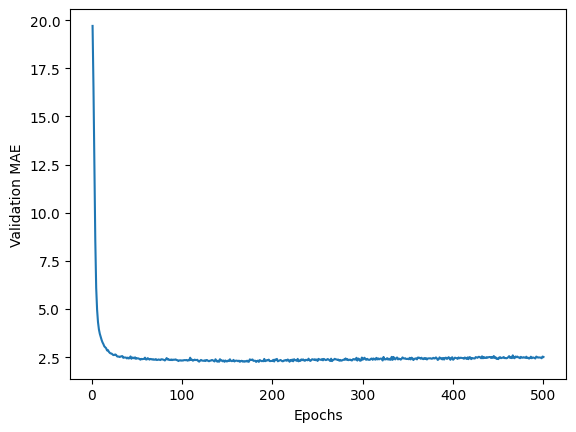

In [79]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history) # plotting the average mae history
plt.xlabel("Epochs") # setting the x-axis label
plt.ylabel("Validation MAE") # setting the y-axis label
plt.show() # displaying the plot

**Plotting validation scores, excluding the first 10 data points**

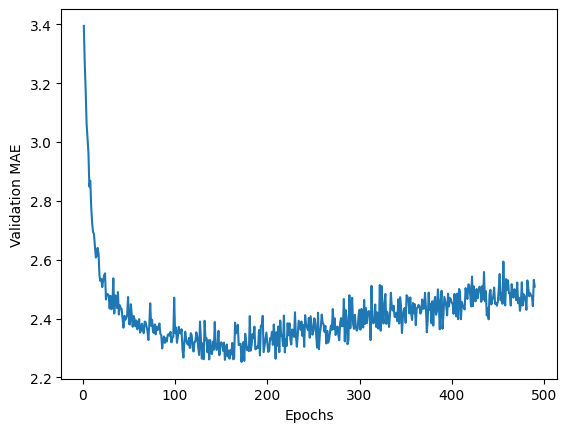

In [80]:
truncated_mae_history = average_mae_history[10:] # truncating the average mae history
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history) # plotting the truncated average mae history
plt.xlabel("Epochs") # setting the x-axis label
plt.ylabel("Validation MAE") # setting the y-axis label
plt.show() # displaying the plot

**Training the final model**

In [81]:
model = build_model() # building the model
model.fit(train_data, train_targets, epochs=130, batch_size=16, verbose=0) # fitting the model to the training data and labels
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets) # evaluating the model on the test data and labels

4/4 [==============================] - 0s 818us/step - loss: 15.9575 - mae: 2.5290


In [82]:
test_mae_score # displaying the test mae score

2.528975486755371

### Generating predictions on new data

In [83]:
predictions = model.predict(test_data) # predicting the test data using the model
predictions[0] # displaying the first prediction

4/4 [==============================] - 0s 629us/step


array([7.7390227], dtype=float32)

### Wrapping up

## Summary